# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#!git clone https://github.com/aiedu-courses/stepik_linear_models.git /content/drive/MyDrive/StepicLin


Cloning into '/content/drive/MyDrive/StepicLin'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 30 (delta 8), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (30/30), 761.32 KiB | 4.91 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import os

# Replace with the actual path to your downloaded directory
directory_path = '/content/drive/MyDrive/StepicLin/datasets'

# List the contents of the directory
contents = os.listdir(directory_path)
print(contents)


['D_clients.csv', 'D_close_loan.csv', 'D_job.csv', 'D_last_credit.csv', 'D_loan.csv', 'D_pens.csv', 'D_salary.csv', 'D_target.csv', 'D_work.csv', 'wineQualityReds.csv']


In [ ]:
import re
names = []
for k in contents:
    if re.search("^D_.*\.csv$", k):
        names.append(k.lstrip('D_').rstrip('.csv'))

In [ ]:
names

['client',
 'close_loan',
 'job',
 'last_credit',
 'loan',
 'pen',
 'salary',
 'target',
 'work']

In [ ]:
import pandas as pd


In [ ]:

dataframes = {}

# Create dataframes and assign names dynamically
for name, df in list(zip(names, contents)):
    dataframes[name] = pd.read_csv(directory_path+'/'+df)




client
close_loan
job
last_credit
loan
pen
salary
target
work


In [ ]:
pip install ydata-profiling==4.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.6
    Uninstalling urllib3-2.0.6:
      Successfully uninstalled urllib3-2.0.6
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Succ

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
dataframes.keys()

dict_keys(['client', 'close_loan', 'job', 'last_credit', 'loan', 'pen', 'salary', 'target', 'work'])

In [ ]:
client = ProfileReport(dataframes['client'])
client

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
close_loan = ProfileReport(dataframes['close_loan'])
close_loan

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
loan = ProfileReport(dataframes['loan'])
loan

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
last_credit = ProfileReport(dataframes['last_credit'])
last_credit

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
job = ProfileReport(dataframes['job'])
job

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
work = ProfileReport(dataframes['work'])
work

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
salary = ProfileReport(dataframes['salary'])
salary

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pen = ProfileReport(dataframes['pen'])
pen

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
target = ProfileReport(dataframes['target'])
target

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = pd.merge(dataframes['target'], dataframes['client'], how = 'left', left_on = "ID_CLIENT", right_on = "ID")

In [ ]:
df_loan = pd.merge(dataframes['loan'], dataframes['close_loan'], how = 'left', on = 'ID_LOAN')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21126 entries, 0 to 21125
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID_LOAN    21126 non-null  int64
 1   ID_CLIENT  21126 non-null  int64
 2   CLOSED_FL  21126 non-null  int64
dtypes: int64(3)
memory usage: 660.2 KB


In [ ]:
grouped = df_loan.groupby('ID_CLIENT')

In [ ]:
d_loan = grouped['CLOSED_FL'].agg(['count', 'sum'])
d_loan

count  sum
ID_CLIENT            
106804370      1    1
106804371      1    1
106804372      2    1
106804373      1    1
106804374      2    1
...          ...  ...
106819588      3    2
106819589      1    0
106819590      1    0
106819591      1    0
106819592      1    0

[15223 rows x 2 columns]

In [ ]:
d_loan.columns = ['LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']

In [ ]:
d_loan

LOAN_NUM_TOTAL  LOAN_NUM_CLOSED
ID_CLIENT                                 
106804370               1                1
106804371               1                1
106804372               2                1
106804373               1                1
106804374               2                1
...                   ...              ...
106819588               3                2
106819589               1                0
106819590               1                0
106819591               1                0
106819592               1                0

[15223 rows x 2 columns]

In [ ]:
ddf = pd.merge(df, d_loan, how = 'left', on = 'ID_CLIENT')


In [ ]:
ddf = pd.merge(ddf, dataframes['last_credit'], how = 'left', on = 'ID_CLIENT')


In [ ]:
ddf = pd.merge(ddf, dataframes['job'], how = 'left', on = 'ID_CLIENT')


In [ ]:
dataframes['salary'].drop_duplicates(inplace=True)

dataframes['salary'].shape

(15223, 3)

In [ ]:
ddf = pd.merge(ddf, dataframes['salary'], how = 'left', on = 'ID_CLIENT')
ddf.shape


(15223, 28)

In [ ]:
ddf.drop('ID', axis=1, inplace=True)



In [ ]:
ddf.drop('ID_CLIENT', axis=1, inplace=True)


In [ ]:
ddf.head()

AGREEMENT_RK  TARGET  AGE  GENDER            EDUCATION  MARITAL_STATUS  \
0      59910150       0   49       1  Среднее специальное  Состою в браке   
1      59910230       0   32       1              Среднее  Состою в браке   
2      59910525       0   52       1     Неполное среднее  Состою в браке   
3      59910803       0   39       1               Высшее  Состою в браке   
4      59911781       0   30       0              Среднее  Состою в браке   

   CHILD_TOTAL  DEPENDANTS  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  ...  \
0            2           1                  1                  0  ...   
1            3           3                  1                  0  ...   
2            4           0                  1                  0  ...   
3            1           1                  1                  0  ...   
4            0           0                  1                  0  ...   

  LOAN_NUM_CLOSED    CREDIT TERM  FST_PAYMENT               GEN_INDUSTRY  \
0               1   8000.00    6       8650.0                   Торговля   
1               1  21650.00    6       4000.0                   Торговля   
2               1  33126.00   12       4000.0  Информационные технологии   
3               1   8491.82    6       5000.0                Образование   
4               1  21990.00   12       4000.0     Государственная служба   

                     GEN_TITLE                        JOB_DIR  WORK_TIME  \
0                      Рабочий    Вспомогательный техперсонал       18.0   
1                      Рабочий  Участие в основ. деятельности       97.0   
2                   Специалист  Участие в основ. деятельности       84.0   
3  Руководитель среднего звена  Участие в основ. деятельности      168.0   
4                   Специалист  Участие в основ. деятельности      101.0   

            FAMILY_INCOME  PERSONAL_INCOME  
0  от 10000 до 20000 руб.           5000.0  
1  от 10000 до 20000 руб.          12000.0  
2  от 10000 до 20000 руб.           9000.0  
3  от 20000 до 50000 руб.          25000.0  
4  от 10000 до 20000 руб.          12000.0  

[5 rows x 26 columns]

In [ ]:
ddf.to_csv('/content/drive/MyDrive/StepicLin/data.csv', index = False)

In [ ]:
report = ProfileReport(ddf)
report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

ddf.drop(ddf[ddf['WORK_TIME'] >= 12 * ddf['AGE']].index, inplace = True)
ddf.shape

(15205, 26)

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


In [ ]:
ddf.drop(['WORK_TIME'], axis = 1,  inplace = True)


In [ ]:
ddf.columns

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'GENDER', 'EDUCATION',
       'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO',
       'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'CREDIT', 'TERM', 'FST_PAYMENT',
       'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'WORK_TIME', 'FAMILY_INCOME',
       'PERSONAL_INCOME'],
      dtype='object')

In [ ]:
ddf.head()

AGREEMENT_RK  TARGET  AGE  GENDER  CHILD_TOTAL  DEPENDANTS  \
0      59910150       0   49       1            2           1   
1      59910230       0   32       1            3           3   
2      59910525       0   52       1            4           0   
3      59910803       0   39       1            1           1   
4      59911781       0   30       0            0           0   

   SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  FACT_ADDRESS_PROVINCE  \
0                  1                  0                      0   
1                  1                  0                      0   
2                  1                  0                      0   
3                  1                  0                      0   
4                  1                  0                      0   

   LOAN_NUM_TOTAL  LOAN_NUM_CLOSED    CREDIT  PERSONAL_INCOME  
0               1                1   8000.00           5000.0  
1               1                1  21650.00          12000.0  
2               2                1  33126.00           9000.0  
3               1                1   8491.82          25000.0  
4               2                1  21990.00          12000.0

In [ ]:
def recode_value(value):
    if (value == 'Москва') | (value == 'Санкт-Петербург'):
        return 1
    else:
        return 0

# Use the apply() method to recode the 'Value' column

In [ ]:
ddf['FACT_ADDRESS_PROVINCE'] = ddf['FACT_ADDRESS_PROVINCE'].apply(recode_value)



In [ ]:
ddf.head()

AGREEMENT_RK  TARGET  AGE  GENDER  CHILD_TOTAL  DEPENDANTS  \
0      59910150       0   49       1            2           1   
1      59910230       0   32       1            3           3   
2      59910525       0   52       1            4           0   
3      59910803       0   39       1            1           1   
4      59911781       0   30       0            0           0   

   SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  FACT_ADDRESS_PROVINCE  \
0                  1                  0                      0   
1                  1                  0                      0   
2                  1                  0                      0   
3                  1                  0                      0   
4                  1                  0                      0   

   LOAN_NUM_TOTAL  LOAN_NUM_CLOSED    CREDIT  WORK_TIME  PERSONAL_INCOME  
0               1                1   8000.00       18.0           5000.0  
1               1                1  21650.00       97.0          12000.0  
2               2                1  33126.00       84.0           9000.0  
3               1                1   8491.82      168.0          25000.0  
4               2                1  21990.00      101.0          12000.0

## Задание 1

В предыдущем задании вы собрали всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

Загрузите эту таблицу.

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/StepicLin/data.csv')
df.head()

AGREEMENT_RK  TARGET  AGE  GENDER  CHILD_TOTAL  DEPENDANTS  \
0      59910150       0   49       1            2           1   
1      59910230       0   32       1            3           3   
2      59910525       0   52       1            4           0   
3      59910803       0   39       1            1           1   
4      59911781       0   30       0            0           0   

   SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  FACT_ADDRESS_PROVINCE  \
0                  1                  0                      0   
1                  1                  0                      0   
2                  1                  0                      0   
3                  1                  0                      0   
4                  1                  0                      0   

   LOAN_NUM_TOTAL  LOAN_NUM_CLOSED    CREDIT  WORK_TIME  PERSONAL_INCOME  
0               1                1   8000.00       18.0           5000.0  
1               1                1  21650.00       97.0          12000.0  
2               2                1  33126.00       84.0           9000.0  
3               1                1   8491.82      168.0          25000.0  
4               2                1  21990.00      101.0          12000.0

In [14]:
df.drop(['WORK_TIME'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15205 entries, 0 to 15204
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGREEMENT_RK           15205 non-null  int64  
 1   TARGET                 15205 non-null  int64  
 2   AGE                    15205 non-null  int64  
 3   GENDER                 15205 non-null  int64  
 4   CHILD_TOTAL            15205 non-null  int64  
 5   DEPENDANTS             15205 non-null  int64  
 6   SOCSTATUS_WORK_FL      15205 non-null  int64  
 7   SOCSTATUS_PENS_FL      15205 non-null  int64  
 8   FACT_ADDRESS_PROVINCE  15205 non-null  int64  
 9   LOAN_NUM_TOTAL         15205 non-null  int64  
 10  LOAN_NUM_CLOSED        15205 non-null  int64  
 11  CREDIT                 15205 non-null  float64
 12  PERSONAL_INCOME        15205 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 1.5 MB


Разбейте данные на тренировочную и тестовую часть в пропорции 80% к 20%, зафиксируйте `random_state = 42`.

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TARGET'], axis = 1), df['TARGET'], test_size=0.2, random_state=42)

На тренировочных данных обучите линейную модель классификации для предсказания целевой переменной (столбец `TARGET`).

Сделайте прогноз вероятности отклика на рекламную кампанию для тестовых данных.

In [22]:
sc = StandardScaler() # x -> (x - mean) / std

sc.fit(X_train) # вычисляем mean, std

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score

In [32]:
lr = LogisticRegression() # точное решение

lr.fit(X_train, y_train) # минимизируем функцию потерь

y_pred_lr = lr.predict_proba(X_test)
y_pred_lr

array([[0.89895567, 0.10104433],
       [0.9044591 , 0.0955409 ],
       [0.92831652, 0.07168348],
       ...,
       [0.86484576, 0.13515424],
       [0.9120063 , 0.0879937 ],
       [0.83563718, 0.16436282]])

In [52]:
lr.coef_

array([[ 0.07352021, -0.28066697, -0.00469022,  0.10741221, -0.00430734,
         0.14703829, -0.10955876,  0.03340465,  0.25202025, -0.43648127,
         0.02106715,  0.18328104]])

In [53]:
X_test.columns

Index(['AGREEMENT_RK', 'AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'FACT_ADDRESS_PROVINCE',
       'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'CREDIT', 'PERSONAL_INCOME'],
      dtype='object')

Переведите вероятности в классы по стандартному порогу (0.5) и на тестовом наборе данных вычислите метрики:

* accuracy
* precision
* recall
* f1-score

In [44]:
y_pred = np.argmax(y_pred_lr > 0.5, axis = 1)

In [45]:
accuracy_score(y_test, y_pred)

0.8868793160144689

In [46]:
precision_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [47]:
recall_score(y_test, y_pred)

0.0

In [51]:
f1_score(y_test, y_pred)

0.0

Целевая метрика для задачи - полнота, так как нам нужно найти максимум клиентов, кто может откликнуться на рекламу.

Но при этом точность не должна просесть, поэтому за ней тоже следим.

Разбейте тренировочные данные на `train` и `val` части в пропорции 3 к 1.

В цикле:

* переберите пороги от 0 до 1 с шагом 0.01
* вычислите для каждого порога значение метрик precision и recall
* подберите такой порог, при котором recall не меньше 0.66, а точность максимальна.

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [55]:
thrs = np.arange(0,1,0.01)
thrs

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [79]:
lr.fit(X_train, y_train) # минимизируем функцию потерь

y_pred_val = lr.predict_proba(X_val)


In [ ]:
precision = []
recall = []
for t in thrs:
    y_pred = np.argmax(y_pred_val > (t, 1-t), axis = 1)
    p = precision_score(y_val, y_pred)
    precision.append(p)
    r = recall_score(y_val, y_pred)
    recall.append(r)

In [80]:
y_pred_val

array([[0.91322217, 0.08677783],
       [0.8965585 , 0.1034415 ],
       [0.88064334, 0.11935666],
       ...,
       [0.93917083, 0.06082917],
       [0.86904171, 0.13095829],
       [0.85046421, 0.14953579]])

In [65]:
import matplotlib.pyplot as plt

In [89]:
recall = np.array(recall)
precision = np.array(precision)

In [76]:
recall.size

100

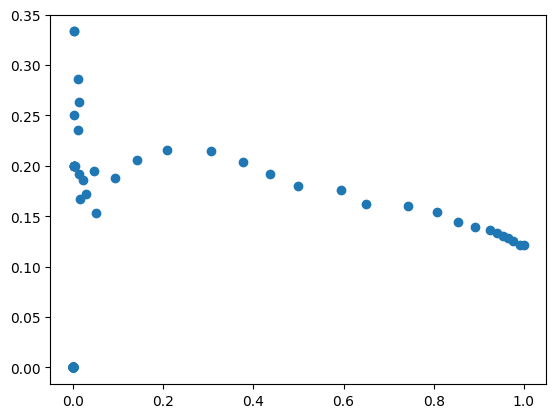

In [90]:
plt.scatter(recall,precision)

In [102]:
metrica = np.array(list(zip(thrs, recall, precision)))


In [103]:
metrica[recall > 0.66]

array([[0.89      , 0.74254743, 0.16042155],
       [0.9       , 0.80758808, 0.15384615],
       [0.91      , 0.85365854, 0.1446281 ],
       [0.92      , 0.89159892, 0.13934773],
       [0.93      , 0.92411924, 0.13612774],
       [0.94      , 0.9403794 , 0.13295019],
       [0.95      , 0.95392954, 0.13037037],
       [0.96      , 0.96476965, 0.12819589],
       [0.97      , 0.97560976, 0.12526096],
       [0.98      , 0.99186992, 0.12187812],
       [0.99      , 1.        , 0.12134166]])

In [109]:
y_pred_lr

array([[0.89895567, 0.10104433],
       [0.9044591 , 0.0955409 ],
       [0.92831652, 0.07168348],
       ...,
       [0.86484576, 0.13515424],
       [0.9120063 , 0.0879937 ],
       [0.83563718, 0.16436282]])

Для выбранного порога посчитайте все метрики на тестовых данных. Сильно ли они отличаются от метрик на валидации?

In [110]:
y_pred_test = np.argmax(y_pred_lr > (0.89, 0.11), axis = 1)

In [111]:
accuracy_score(y_test, y_pred_test)

0.4873396908911542

In [112]:
precision_score(y_test, y_pred_test)

0.14659685863874344

In [113]:
recall_score(y_test, y_pred_test)

0.7325581395348837

In [114]:
f1_score(y_test, y_pred_test)

0.2443044110518662

Выведите на экран в виде таблицы топ-6 признаков с наибольшими по модулю весами модели.

In [119]:
lr.coef_

array([[ 0.07613717, -0.3052945 , -0.00302942,  0.1362001 , -0.04068797,
         0.16099651, -0.14947701,  0.02173615,  0.2424844 , -0.43747407,
         0.01058981,  0.18762372]])

In [127]:
lr.feature_names_in_

array(['AGREEMENT_RK', 'AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'FACT_ADDRESS_PROVINCE',
       'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'CREDIT', 'PERSONAL_INCOME'],
      dtype=object)

In [129]:
top = dict(zip(lr.feature_names_in_, lr.coef_[0]))
top

{'AGREEMENT_RK': 0.07613717073445131,
 'AGE': -0.3052944963177516,
 'GENDER': -0.003029417675520241,
 'CHILD_TOTAL': 0.13620010156648732,
 'DEPENDANTS': -0.040687970244902914,
 'SOCSTATUS_WORK_FL': 0.16099650937949245,
 'SOCSTATUS_PENS_FL': -0.1494770138895994,
 'FACT_ADDRESS_PROVINCE': 0.021736145689216627,
 'LOAN_NUM_TOTAL': 0.24248439630656982,
 'LOAN_NUM_CLOSED': -0.4374740694588907,
 'CREDIT': 0.01058981010166387,
 'PERSONAL_INCOME': 0.18762371836028927}

In [130]:
a = np.sort(np.abs(lr.coef_[0]))[-6:]
a

array([0.14947701, 0.16099651, 0.18762372, 0.2424844 , 0.3052945 ,
       0.43747407])

In [132]:
for k,v in top.items():
    if abs(v) in a:
        print(k,v)

AGE -0.3052944963177516
SOCSTATUS_WORK_FL 0.16099650937949245
SOCSTATUS_PENS_FL -0.1494770138895994
LOAN_NUM_TOTAL 0.24248439630656982
LOAN_NUM_CLOSED -0.4374740694588907
PERSONAL_INCOME 0.18762371836028927


## Задание 2

Добавьте в Streamlit-приложение визуализацию результатов модели:

* опцию выбора порога и вывод метрик качества в зависимости от выбранного порога

* вывод прогноза модели на выбранном объекте (клиенте) - вероятность отклика на рекламу.

## Бонус

Попробуйте применить другие модели классификации для решения этой задачи (любые какие знаете).

Удалось ли добиться улучшения качества модели?

In [ ]:
# your code here